# Mortality Rate Prediction

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Overview

In [3]:
df = pd.read_csv('mimic_dataset.csv')
print(df.shape)
print(df.head())

(311780, 87)
   bloc  icustayid    timestep  gender  age  elixhauser  re_admission  \
0     1   30000153  6461579640       1   61           1         False   
1     1   30000484  5239603260       1   92           4          True   
2     2   30000484  5239617660       1   92           4          True   
3     3   30000484  5239632060       1   92           4          True   
4     4   30000484  5239646460       1   92           4          True   

   died_in_hosp  died_within_48h_of_out_time  morta_90  ...  max_dose_vaso  \
0             0                        False         0  ...            0.0   
1             0                        False         1  ...            0.0   
2             0                        False         1  ...            0.0   
3             0                        False         1  ...            0.0   
4             0                        False         1  ...            0.0   

   input_step  input_total  output_step  output_total  cumulated_balance  \
0  

In [4]:
print(f"icustayid count: {df['icustayid'].nunique()}")

icustayid count: 29060


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311780 entries, 0 to 311779
Data columns (total 87 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   bloc                                        311780 non-null  int64  
 1   icustayid                                   311780 non-null  int64  
 2   timestep                                    311780 non-null  int64  
 3   gender                                      311780 non-null  int64  
 4   age                                         311780 non-null  int64  
 5   elixhauser                                  311780 non-null  int64  
 6   re_admission                                311780 non-null  bool   
 7   died_in_hosp                                311780 non-null  int64  
 8   died_within_48h_of_out_time                 311780 non-null  bool   
 9   morta_90                                    311780 non-null  int64  
 

In [6]:
df.describe()

,bloc,icustayid,timestep,gender,age,elixhauser,died_in_hosp,morta_90,delay_end_of_record_and_discharge_or_death,Height_cm,...,max_dose_vaso,input_step,input_total,output_step,output_total,cumulated_balance,Shock_Index,PaO2_FiO2,SOFA,SIRS
count,311780.000000,3.117800e+05,3.117800e+05,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,...,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000,311780.000000
mean,7.015732,3.495968e+07,5.818270e+09,0.562243,65.335198,5.053265,0.173610,0.282632,255.129365,168.304798,...,0.080975,286.359528,4768.531224,302.338679,3313.997368,1454.533869,0.766267,271.759154,5.186276,1.576076
std,4.518833,2.880636e+06,7.506581e+08,0.496112,16.443981,2.351170,0.378774,0.450280,314.885969,13.561465,...,1.253395,510.803987,6544.811275,1618.587331,6189.976443,6879.710425,0.268088,203.799519,2.890227,1.016386
min,1.000000,3.000015e+07,4.418924e+09,0.000000,18.000000,0.000000,0.000000,0.000000,-84.116700,0.000000,...,0.000000,0.000000,0.000000,-600.000000,-600.000000,-878727.000000,0.000000,-152.381000,0.000000,0.000000
25%,3.000000,3.247667e+07,5.202345e+09,0.000000,55.000000,3.000000,0.000000,0.000000,76.000000,160.020000,...,0.000000,0.000000,575.386750,60.000000,600.000000,-854.324750,0.618801,143.111000,3.000000,1.000000
50%,6.000000,3.492436e+07,5.808117e+09,1.000000,67.000000,5.000000,0.000000,0.000000,159.450000,168.000000,...,0.000000,84.039800,2850.000000,200.000000,1665.000000,642.084000,0.741312,219.048000,5.000000,2.000000
75%,10.000000,3.746190e+07,6.445775e+09,1.000000,78.000000,7.000000,0.000000,1.000000,319.883000,177.800000,...,0.000000,359.779250,6477.180000,400.000000,3694.000000,3490.322500,0.884645,336.111000,7.000000,2.000000
max,20.000000,3.999917e+07,7.717551e+09,1.000000,103.000000,14.000000,1.000000,1.000000,7378.500000,429.000000,...,359.551000,16172.100000,127197.000000,876587.000000,879437.000000,107406.000000,93.476200,2890.480000,20.000000,4.000000


In [7]:
df.isnull().sum()

bloc                 0
icustayid            0
timestep             0
gender               0
age                  0
                    ..
cumulated_balance    0
Shock_Index          0
PaO2_FiO2            0
SOFA                 0
SIRS                 0
Length: 87, dtype: int64

## 2. Data Prepareation

In this section, the data preparation process focuses on preparing ICU patient data for predicting the `died_in_hosp` column, which indicates whether a patient died in the hospital. The steps and rationale are as follows:

1. **Convert Boolean Columns to Numeric**:  
    Boolean columns are converted to numeric values to ensure compatibility with the modeling process.

2. **Filter Data for the First 24 Hours**:  
    Data is grouped by `icustayid`, and only the first 24 hours of data are retained. This step is crucial for the following reasons:
    - **Early Warning**: Enables early risk stratification, allowing clinicians to identify high-risk patients within the first day of ICU admission and take timely interventions.
    - **Avoid Time Bias and Target Leakage**: Prevents the model from learning patterns that are only evident in later stages of ICU stay, ensuring the predictions are based on early indicators rather than terminal events.
    - **Ensure Fair Comparisons**: Standardizes the data window across all patients, regardless of their ICU stay duration, ensuring that aggregated features are comparable.

3. **Rationale for Using the First 24 Hours**:  
    - Early predictions are more clinically valuable and align with real-world workflows.
    - Avoids introducing biases or learning trivial patterns related to terminal states.
    - Ensures consistent feature definitions and fair comparisons across patients.

By focusing on the first 24 hours, the data preparation process adheres to industry best practices and sets the foundation for building a early warning model.

In [8]:
bool_cols = []
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [9]:
df_sorted = df.sort_values(['icustayid', 'timestep']).copy()

# Filter the data from the previous 24 hours of each ICU stay
first_timestamps = df_sorted.groupby('icustayid')['timestep'].transform('first')
df_sorted['time_from_admission'] = df_sorted['timestep'] - first_timestamps
HOURS_24_IN_SECONDS = 24 * 60 * 60 # # timestep(s)  24h = 24*60*60 = 86400s
df_24h = df_sorted[df_sorted['time_from_admission'] <= HOURS_24_IN_SECONDS].copy().drop(columns=['time_from_admission'])

print(f"original data row count: {len(df)}")
print(f"data row count within first 24h of each ICU stay: {len(df_24h)}")
print(f"icustayid count: {df_24h['icustayid'].nunique()}")
print(f"average rows per icustayid: {len(df_24h) / df_24h['icustayid'].nunique():.1f}")

original data row count: 311780
data row count within first 24h of each ICU stay: 182601
icustayid count: 29060
average rows per icustayid: 6.3


## 2. Feature Selection

- **Exclude target leakage variables**: The dataset description explicitly states that `delay_end_of_record_and_discharge_or_death` contains information about the outcome, and `died_within_48h_of_out_time`, `morta_90`includes information on whether the patient died within 48 hours and 90 days after leaving the ICU sepreately. These must be excluded, as they would cause the model to "peek" at the answers, making it unusable in real-world scenarios.  

- **Exclude identifiers**: `bloc`, `icustayid`, and `timestep` are identifiers or time indices and should not be used as predictive features in the model.  

- **Exclude features with high missing rates**: The description mentions that variables such as `SVR`, `CI`, `PAP`, and `SvO2` have missing rates exceeding 95%. For an initial model, the simplest approach is to directly remove these columns, as they contain too little information, and forcing imputation may introduce noise.   

In [10]:
missing_rates = (df_24h.isnull().sum() / len(df_24h)).sort_values(ascending=False)
print(missing_rates[missing_rates>0])


SVR              1.000000
Total_protein    0.999409
ACT              0.992256
CI               0.991517
CRP              0.974398
SvO2             0.954086
PAPmean          0.952678
PAPsys           0.952163
PAPdia           0.952147
ETCO2            0.058269
dtype: float64


In [11]:
identifier_cols = ['bloc', 'timestep']
leak_cols = ['delay_end_of_record_and_discharge_or_death', 'died_within_48h_of_out_time', 'morta_90']
high_missing_cols = missing_rates[missing_rates > 0.95].index.tolist()
cols_to_drop = identifier_cols + leak_cols + high_missing_cols


print(f"Columns to be dropped ({len(cols_to_drop)}): ")
print(f"  - identifier: columns: {identifier_cols}")
print(f"  - leak columns: {leak_cols}")
print(f"  - high missing rate columns: {high_missing_cols}")

df_cleaned = df_24h.drop(columns=cols_to_drop)
print(f"shape of the cleaned data:: {df_cleaned.shape}")

Columns to be dropped (14): 
  - identifier: columns: ['bloc', 'timestep']
  - leak columns: ['delay_end_of_record_and_discharge_or_death', 'died_within_48h_of_out_time', 'morta_90']
  - high missing rate columns: ['SVR', 'Total_protein', 'ACT', 'CI', 'CRP', 'SvO2', 'PAPmean', 'PAPsys', 'PAPdia']
shape of the cleaned data:: (182601, 73)


## 3. Variable Classification

## 3. Variable Classification

In this section, variables are classified into three categories: static variables, dynamic continuous variables, and binary/categorical variables. This classification is essential for the subsequent feature engineering process, where different aggregation rules will be applied to each category.

### 1. Static Variables
Static variables are those that remain constant during the ICU stay. These variables typically describe patient demographics or baseline characteristics. Examples include:
- `gender`: Gender of the patient.
- `age`: Age of the patient.
- `elixhauser`: Elixhauser comorbidity index.
- `re_admission`: Whether the patient was readmitted to the ICU.
- `Height_cm`: Height of the patient in centimeters.
- `Weight_kg`: Weight of the patient in kilograms.

### 2. Binary/Categorical Variables
Binary or categorical variables represent states or events that can be either true/false or belong to a limited set of categories. Examples include:
- `mechvent`: Whether the patient was on mechanical ventilation.
- `extubated`: Whether the patient was extubated.

### 3. Dynamic Continuous Variables
Dynamic continuous variables are time-varying measurements recorded during the ICU stay. These variables are typically numeric and represent physiological or clinical measurements. Examples include:
- `HR`: Heart rate.
- `SysBP`: Systolic blood pressure.
- `MeanBP`: Mean blood pressure.
- `RR`: Respiratory rate.
- `SpO2`: Oxygen saturation.

### Purpose of Classification
The classification of variables is crucial for the feature engineering process, where different aggregation rules will be applied to each category.

In [12]:
target_col = 'died_in_hosp'

# static variables
static_vars = [
    'gender',
    'age',
    'elixhauser',
    're_admission',
    'Height_cm',
    'Weight_kg'
]


# binary/classification variables
binary_vars = [
    'mechvent',
    'extubated'
]

# dynamic variables
all_features = [col for col in df_cleaned.columns 
                if col not in ['icustayid', target_col]]
dynamic_vars = [col for col in all_features 
                if col not in static_vars and col not in binary_vars]

print(f"static variables ({len(static_vars)}): {', '.join(static_vars)}")
print(f"binary variables ({len(binary_vars)}): {', '.join(binary_vars)}")
print(f"dynamic variables ({len(dynamic_vars)}): {', '.join(dynamic_vars)}...")

static variables (6): gender, age, elixhauser, re_admission, Height_cm, Weight_kg
binary variables (2): mechvent, extubated
dynamic variables (63): GCS, RASS, HR, SysBP, MeanBP, DiaBP, RR, SpO2, Temp_C, Temp_F, CVP, Interface, FiO2_100, FiO2_1, O2flow, PEEP, TidalVolume, MinuteVentil, PAWmean, PAWpeak, PAWplateau, Potassium, Sodium, Chloride, Glucose, BUN, Creatinine, Magnesium, Calcium, Ionised_Ca, CO2_mEqL, SGOT, SGPT, Total_bili, Direct_bili, Albumin, Troponin, Hb, Ht, RBC_count, WBC_count, Platelets_count, PTT, PT, INR, Arterial_pH, paO2, paCO2, Arterial_BE, Arterial_lactate, HCO3, ETCO2, median_dose_vaso, max_dose_vaso, input_step, input_total, output_step, output_total, cumulated_balance, Shock_Index, PaO2_FiO2, SOFA, SIRS...


## 4. Feature Engineering - Aggregation of Time Series  
  
The dataset contains time-series data for each ICU stay. To convert this into a format suitable for machine learning models, the following aggregation rules were applied:

- **Static Variables**: These variables remain constant during the ICU stay (e.g., `gender`, `age`, `Height_cm`, `Weight_kg`). The first recorded value was used for aggregation. For `Height_cm` and `Weight_kg`, the mode was calculated to handle potential recording errors.
  
- **Binary/Categorical Variables**: These variables represent states or events (e.g., `mechvent`, `extubated`). Two aggregation methods were applied:
  - `mean`: Represents the proportion of time the event occurred.
  - `max`: Indicates whether the event occurred at least once.

- **Dynamic Continuous Variables**: These variables are time-varying measurements (e.g., `HR`, `SysBP`, `RR`). The following statistics were calculated:
  - `mean`: Average value over time.
  - `min`: Minimum value.
  - `max`: Maximum value.
  - `std`: Standard deviation.
  - `last`: Last recorded value.

- **Target Variable**: The target variable (`died_in_hosp`) was aggregated by taking the last recorded value.   
  
The purpose of feature engineering to transform each ICU record into a single row of data is to ensure that the data satisfies the assumption of independence and identical distribution (i.i.d.) required by models such as logistic regression. Since each `icustayid` corresponds to multiple rows of data, this transformation aggregates the time-series data into a single representation for each ICU stay.

In [13]:
# Define aggregation rules
agg_dict = {}

# static variable: Take the first value/mode
for col in static_vars:
    if col in df_cleaned.columns:
        if col in ['Height_cm', 'Weight_kg']:
            # calculate the mode (in cases where there may be recording errors)
            agg_dict[col] = lambda x: x.mode().iloc[0] if not x.mode().empty else None
        else:
            agg_dict[col] = 'first'

# binary variable: mean, max
for col in binary_vars:
    if col in df_cleaned.columns:
        agg_dict[col] = ['mean', 'max']

# dynamic variables: mean, min, max, std, last
for col in dynamic_vars:
    if col in df_cleaned.columns:
        agg_dict[col] = ['mean', 'min', 'max', 'std', 'last']

# target variable: last
agg_dict[target_col] = 'last'

In [14]:
# Perform aggregation
df_agg = df_cleaned.groupby('icustayid').agg(agg_dict)

# flatten multi-level columns
df_agg.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) 
                  and col[0] not in static_vars + [target_col] 
                  else col[0]
                  for col in df_agg.columns ]

df_agg = df_agg.reset_index(drop=True)

print(f"data shape after aggregation: {df_agg.shape}")       

data shape after aggregation: (29060, 326)


In [15]:
df_agg.head()

,gender,age,elixhauser,re_admission,Height_cm,Weight_kg,mechvent_mean,mechvent_max,extubated_mean,extubated_max,...,SOFA_min,SOFA_max,SOFA_std,SOFA_last,SIRS_mean,SIRS_min,SIRS_max,SIRS_std,SIRS_last,died_in_hosp
0,1,61,1,0,173.00,115.0,0.000000,0,0.0,0,...,13,13,NaN,13,1.000000,1,1,NaN,1,0
1,1,92,4,1,163.00,68.5,0.000000,0,0.0,0,...,2,8,2.225395,5,2.285714,1,4,0.951190,2,0
2,1,78,9,0,182.88,90.0,0.714286,1,0.0,0,...,5,8,0.975900,7,2.571429,2,3,0.534522,2,0
3,1,56,4,0,178.00,119.3,0.000000,0,0.0,0,...,8,9,0.534522,9,2.000000,0,3,1.000000,0,0
4,0,61,8,0,180.34,78.4,0.000000,0,0.0,0,...,9,11,0.707107,10,1.800000,1,2,0.447214,2,1


## 5. Define X and y

In [16]:
y = df_agg[target_col].astype(int)
X = df_agg.drop(columns=[target_col])

## 6. Data Splitting

- Divide the dataset into the training set and the test set, with an 80/20 ratio.
- To ensure that the proportion of deceased/survived patients in the training set and the test set is consistent with the original data, `stratified sampling` is adopted.

In [17]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, 
    random_state=42, 
    stratify=y
)

print(f"Size of the training set: {X_train.shape}")
print(f"Size of the testing set: {X_test.shape}")
print(f"Training set mortality rate: {y_train.mean():.3f}")
print(f"Testing set mortality rate: {y_test.mean():.3f}")

Size of the training set: (23248, 325)
Size of the testing set: (5812, 325)
Training set mortality rate: 0.165
Testing set mortality rate: 0.165


## 7. Missing Value Imputation

- For numerical features, using the median is often more robust than the mean, as it is not affected by outliers. For categorical features, the mode can be used. 
    
- The imputation values are calculated only on the training set and then applied to both the training and testing sets to prevent data leakage.

In [18]:
print(f"Proportion of missing values:")
missing_proportion = (X.isnull().sum()/X.shape[0]).sort_values(ascending=False) 
print(missing_proportion)

Proportion of missing values:
ETCO2_std         0.087027
ETCO2_min         0.056435
ETCO2_last        0.056435
ETCO2_mean        0.056435
ETCO2_max         0.056435
                    ...   
extubated_max     0.000000
extubated_mean    0.000000
mechvent_max      0.000000
mechvent_mean     0.000000
re_admission      0.000000
Length: 325, dtype: float64


In [19]:
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## 8. Feature Scaling

- Logistic regression models are highly sensitive to the scale of features. Different features (e.g., age and creatinine) can have vastly different value ranges, which can affect the model's convergence speed and performance.  
  
- We need to standardize the features using **StandardScaler**, which scales all features to have a mean of 0 and a variance of 1.  
  
- `StandardScaler` should be fit only on the training set and then used to transform both the training and testing sets. This means the mean and variance are calculated from the training set, and the same scaling is applied to both the training and testing sets.  

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
print('X train after scaling:')
print(X_train_scaled)
print('X test after scaling:')
print(X_test_scaled)

X train after scaling:
[[ 0.89493804  1.18677072  0.01443548 ... -1.39132593 -0.15672227
  -0.55506599]
 [-1.1173958   0.45489882  0.44140258 ...  0.74559775  0.36255966
   0.43695232]
 [-1.1173958  -1.31379158 -0.41253161 ...  0.74559775 -0.11265371
   0.43695232]
 ...
 [ 0.89493804 -0.03301577 -1.2664658  ...  0.74559775  0.68549439
   1.42897063]
 [-1.1173958  -1.00884496 -1.2664658  ... -0.32286409  1.06254431
  -1.5470843 ]
 [ 0.89493804  0.21094153 -0.83949871 ... -0.32286409 -0.15672227
  -0.55506599]]
X test after scaling:
[[ 0.89493804 -2.28962077 -1.6934329  ... -0.32286409  1.3168207
   0.43695232]
 [ 0.89493804  1.18677072  0.01443548 ...  1.81405959 -0.27197589
   1.42897063]
 [ 0.89493804  0.27193085 -0.41253161 ... -2.45978778 -0.15672227
  -1.5470843 ]
 ...
 [ 0.89493804  0.75984545  2.14927096 ... -1.39132593 -0.3122048
  -0.55506599]
 [-1.1173958  -0.21598374  0.44140258 ... -0.32286409 -0.3122048
  -0.55506599]
 [ 0.89493804 -0.27697307  0.86836968 ... -1.39132593 -1

## 9. L1 regularized logistic regression

### 9.1  initialize model

In [21]:
l1_model = LogisticRegression(
    penalty='l1',             # L1 regularization
    solver='liblinear',    
    class_weight='balanced', 
    random_state=42,
    max_iter=1000
)

### 9.2 Define the search range for the hyperparameter C

In [22]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
}


### 9.3 Grid search and cross-validation

In [24]:
grid_search = GridSearchCV(
    estimator=l1_model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='roc_auc',       # use AUC as the evaluation metric
    n_jobs=-1,               
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': [0.0001, 0.001, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


### 9.4 best model

In [25]:
best_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"\nOptimal hyperparameters C: {best_C}")
print(f"Optimal cross-validation AUC: {best_score:.4f}")

print("\nAll the cross-validation results of the C values:")
results_df = pd.DataFrame(grid_search.cv_results_)
for c_val, mean_score, std_score in zip(
    results_df['param_C'], 
    results_df['mean_test_score'], 
    results_df['std_test_score']
):
    print(f"  C={c_val:8.4f}: AUC={mean_score:.4f} (±{std_score:.4f})")



Optimal hyperparameters C: 0.1
Optimal cross-validation AUC: 0.8382

All the cross-validation results of the C values:
  C=  0.0001: AUC=0.5000 (±0.0000)
  C=  0.0010: AUC=0.8046 (±0.0118)
  C=  0.0100: AUC=0.8381 (±0.0112)
  C=  0.1000: AUC=0.8382 (±0.0102)
  C=  0.5000: AUC=0.8361 (±0.0100)
  C=  1.0000: AUC=0.8354 (±0.0100)
  C=  5.0000: AUC=0.8348 (±0.0097)
  C= 10.0000: AUC=0.8354 (±0.0092)
  C= 50.0000: AUC=0.8355 (±0.0088)
  C=100.0000: AUC=0.8355 (±0.0088)


## 8. Model Evaluation

In [26]:
# predict
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)
y_train_proba = best_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Training set performance
print("Training set performance:")
print(f"    - Accuracy rate: {best_model.score(X_train_scaled, y_train):.4f}")
print(f"    - AUC: {roc_auc_score(y_train, y_train_proba):.4f}")

# Testing set performance
print("\nTesting set performance:")
print(f"    - Accuracy rate: {best_model.score(X_test_scaled, y_test):.4f}")
print(f"    - AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

print("\nDetailed classification report (test set):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion matrix (test set)")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"  True Negative (TN): {cm[0,0]}, False Positive (FP): {cm[0,1]}")
print(f"  False Negative (FN): {cm[1,0]}, True Positive (TP): {cm[1,1]}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, 
                          target_names=['survival', 'death']))

Training set performance:
    - Accuracy rate: 0.7819
    - AUC: 0.8523

Testing set performance:
    - Accuracy rate: 0.7834
    - AUC: 0.8506

Detailed classification report (test set):
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4855
           1       0.41      0.73      0.53       957

    accuracy                           0.78      5812
   macro avg       0.67      0.76      0.69      5812
weighted avg       0.85      0.78      0.80      5812


Confusion matrix (test set)
[[3851 1004]
 [ 255  702]]
  True Negative (TN): 3851, False Positive (FP): 1004
  False Negative (FN): 255, True Positive (TP): 702

Classification Report (Test Set):
              precision    recall  f1-score   support

    survival       0.94      0.79      0.86      4855
       death       0.41      0.73      0.53       957

    accuracy                           0.78      5812
   macro avg       0.67      0.76      0.69      5812
weighted avg    

## 9. Feature Analysis - L1 Automatic Feature Selection

In [28]:
coefficients = best_model.coef_[0]

feature_names = X.columns.tolist()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
})


selected_features = feature_importance[feature_importance['coefficient'] != 0]
zero_features = feature_importance[feature_importance['coefficient'] == 0]

print(f"\nThe result of L1 regularization feature selection:")
print(f"  total number of features: {len(feature_names)}")
print(f"  number of selected features: {len(selected_features)}")
print(f"  number of removed features: {len(zero_features)}")
print(f"  feature selection rate: {len(selected_features)/len(feature_names)*100:.1f}%")

# 3. Analyzing Importance - Sorted by Absolute Value
selected_features_sorted = selected_features.sort_values(
    'abs_coefficient', ascending=False
)

print(f"\nTop 20 most important characteristics (sorted by the absolute value of the coefficients):")
for i, row in selected_features_sorted.head(20).iterrows():
    direction = "↑ increase" if row['coefficient'] > 0 else "↓ decrease"
    print(f"{row['feature']:30s}: {row['coefficient']:8.4f} ({direction}mortality risk)")



The result of L1 regularization feature selection:
  total number of features: 325
  number of selected features: 220
  number of removed features: 105
  feature selection rate: 67.7%

Top 20 most important characteristics (sorted by the absolute value of the coefficients):
output_step_mean              :  -0.5940 (↓ decreasemortality risk)
age                           :   0.3865 (↑ increasemortality risk)
Temp_F_last                   :  -0.2855 (↓ decreasemortality risk)
GCS_last                      :  -0.2743 (↓ decreasemortality risk)
SpO2_last                     :  -0.2725 (↓ decreasemortality risk)
elixhauser                    :   0.2571 (↑ increasemortality risk)
Chloride_mean                 :  -0.2470 (↓ decreasemortality risk)
Temp_F_mean                   :  -0.2452 (↓ decreasemortality risk)
Hb_mean                       :  -0.2428 (↓ decreasemortality risk)
extubated_mean                :  -0.2406 (↓ decreasemortality risk)
mechvent_mean                 :   0.2375 (↑ 

## 10. Results Visualization

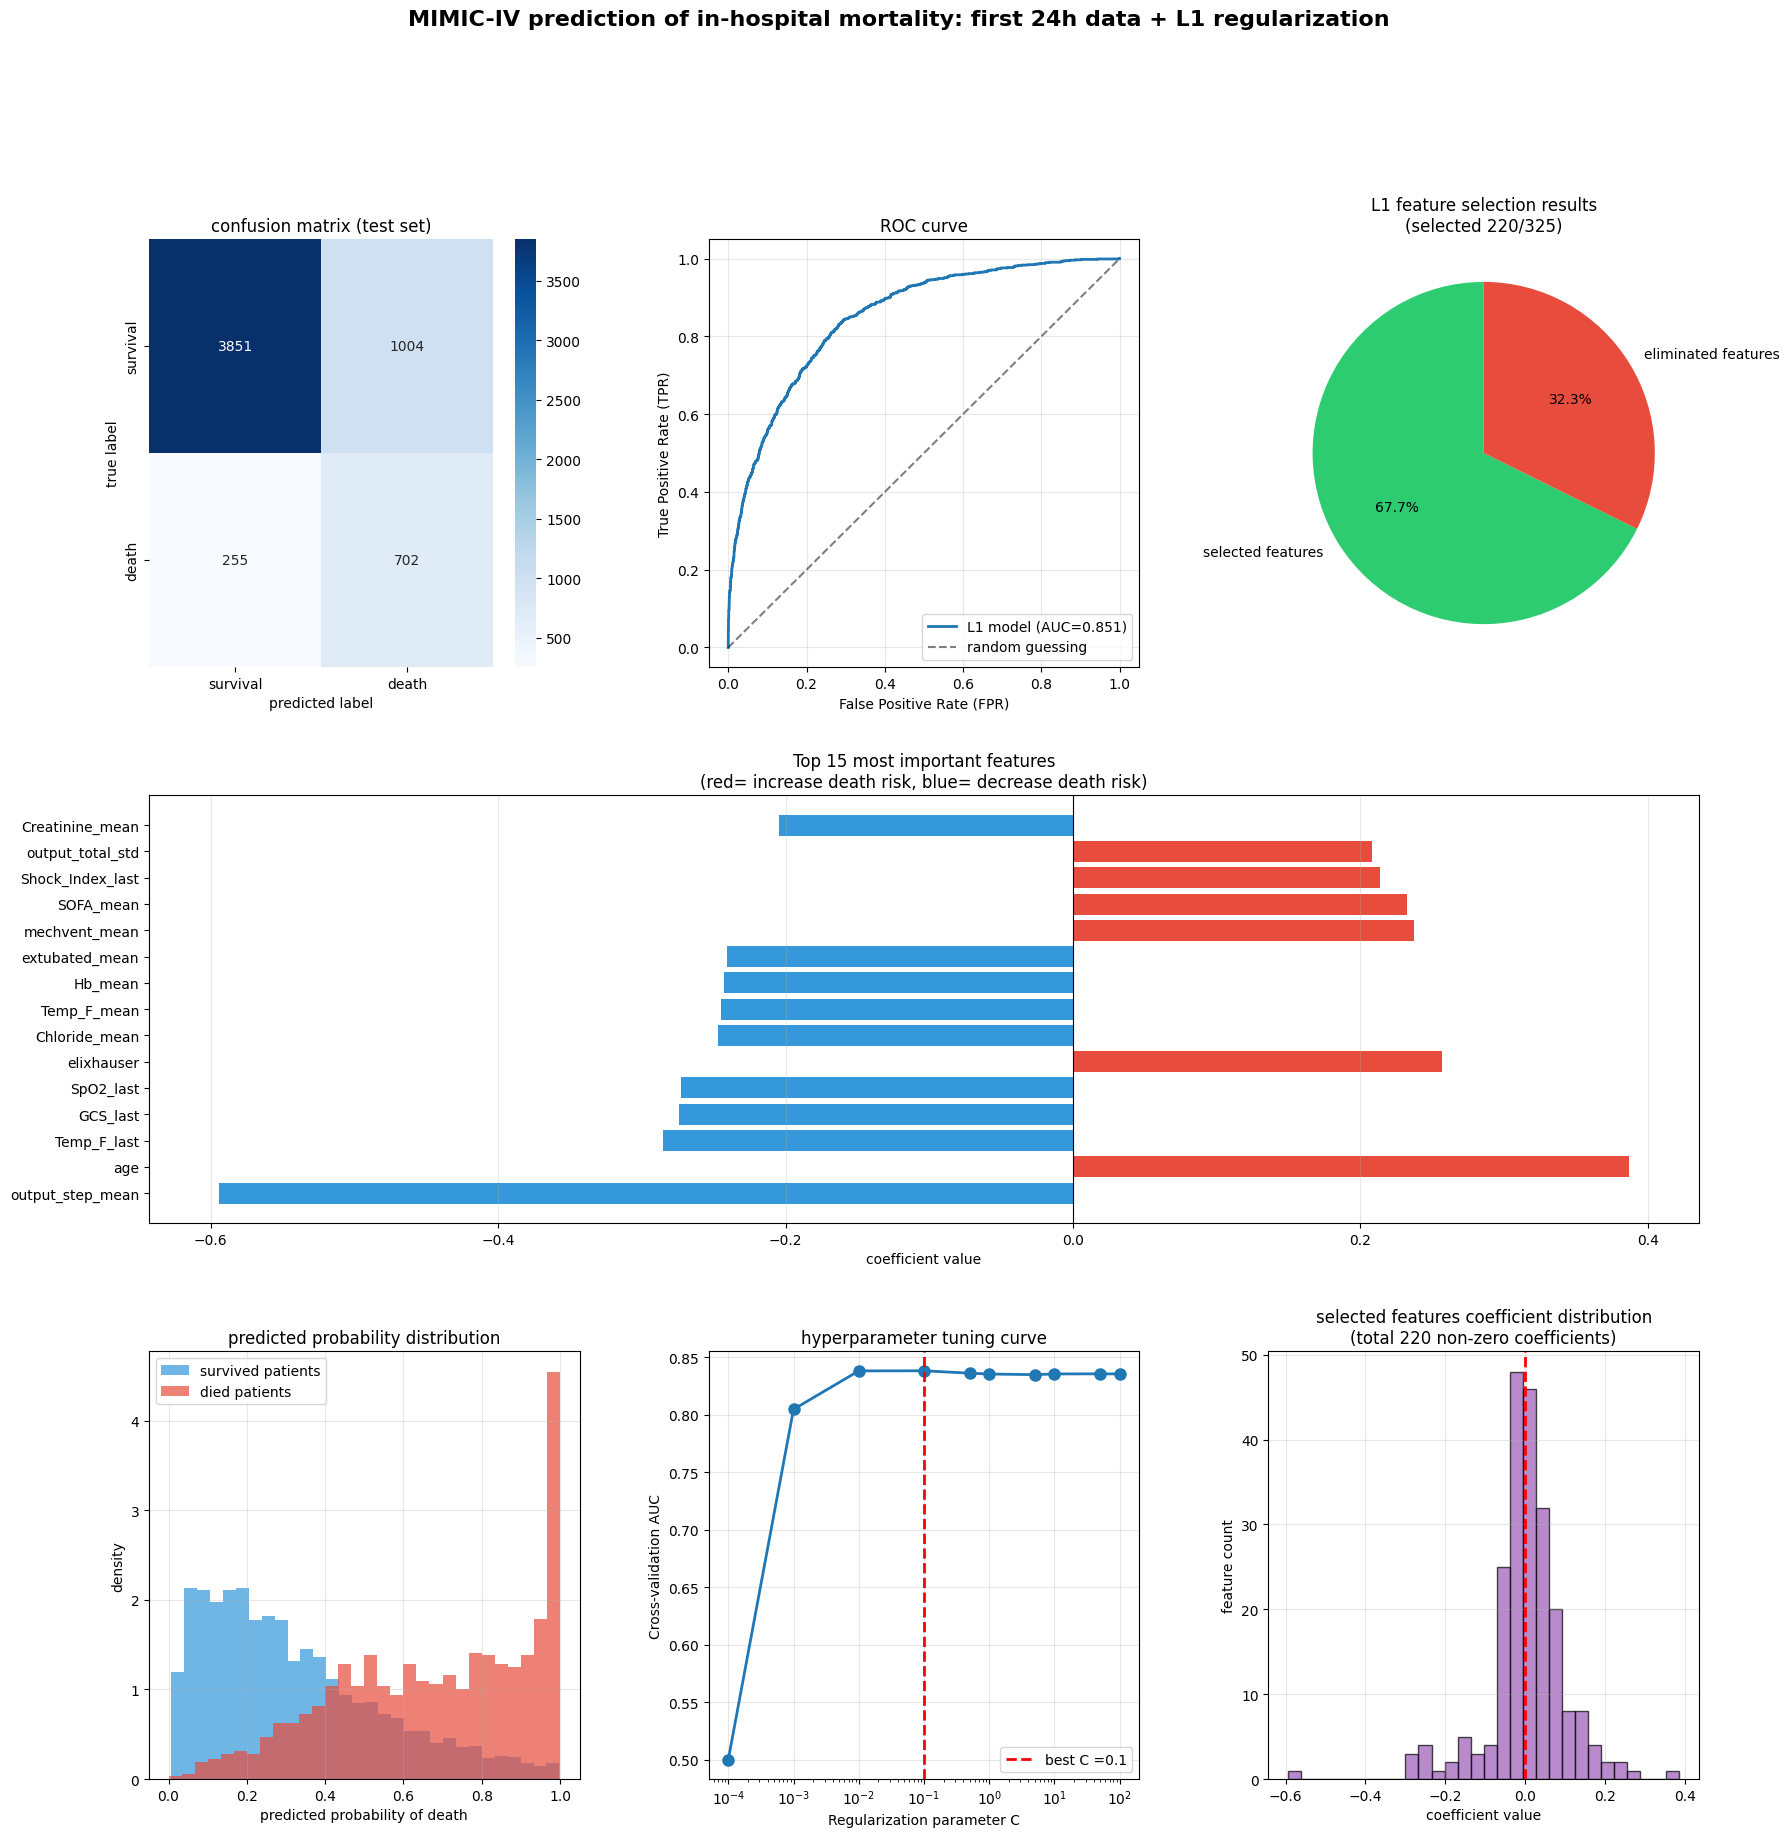

In [31]:
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. confusion matrix
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['survival', 'death'], 
            yticklabels=['survival', 'death'])
ax1.set_title('confusion matrix (test set)')
ax1.set_xlabel('predicted label')
ax1.set_ylabel('true label')

# 2. ROC curve
test_auc = roc_auc_score(y_test, y_test_proba)
ax2 = fig.add_subplot(gs[0, 1])
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
ax2.plot(fpr, tpr, label=f'L1 model (AUC={test_auc:.3f})', linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--', label='random guessing', alpha=0.5)
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC curve')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. feature selection statistics
ax3 = fig.add_subplot(gs[0, 2])
selection_stats = [len(selected_features), len(zero_features)]
ax3.pie(selection_stats, labels=['selected features', 'eliminated features'],
        autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
ax3.set_title(f'L1 feature selection results\n(selected {len(selected_features)}/{len(feature_names)})')

# 4. Top 15 feature importance
ax4 = fig.add_subplot(gs[1, :])
top15 = selected_features_sorted.head(15)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top15['coefficient']]
ax4.barh(range(len(top15)), top15['coefficient'], color=colors)
ax4.set_yticks(range(len(top15)))
ax4.set_yticklabels(top15['feature'])
ax4.set_xlabel('coefficient value')
ax4.set_title('Top 15 most important features\n(red= increase death risk, blue= decrease death risk)')
ax4.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax4.grid(True, axis='x', alpha=0.3)

# 5. predicted probability distribution
ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(y_test_proba[y_test==0], bins=30, alpha=0.7, 
         label='survived patients', density=True, color='#3498db')
ax5.hist(y_test_proba[y_test==1], bins=30, alpha=0.7, 
         label='died patients', density=True, color='#e74c3c')
ax5.set_xlabel('predicted probability of death')
ax5.set_ylabel('density')
ax5.set_title('predicted probability distribution')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Regularization path - The influence of C value on the number of features
ax6 = fig.add_subplot(gs[2, 1])
c_values = param_grid['C']
auc_scores = results_df['mean_test_score'].values
ax6.plot(c_values, auc_scores, 'o-', linewidth=2, markersize=8)
ax6.axvline(x=best_C, color='red', linestyle='--', 
            label=f'best C ={best_C}', linewidth=2)
ax6.set_xscale('log')
ax6.set_xlabel('Regularization parameter C')
ax6.set_ylabel('Cross-validation AUC')
ax6.set_title('hyperparameter tuning curve')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. coefficient distribution of selected features
ax7 = fig.add_subplot(gs[2, 2])
ax7.hist(selected_features['coefficient'], bins=30, 
         color='#9b59b6', alpha=0.7, edgecolor='black')
ax7.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax7.set_xlabel('coefficient value')
ax7.set_ylabel('feature count')
ax7.set_title(f'selected features coefficient distribution\n(total {len(selected_features)} non-zero coefficients)')
ax7.grid(True, alpha=0.3)

plt.suptitle('MIMIC-IV prediction of in-hospital mortality: first 24h data + L1 regularization', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()
